In [8]:
from mpl_toolkits.mplot3d import Axes3D         # Cargo Axes3D de mpl_toolkits.mplot3d
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import pandas as pd
import math
%matplotlib inline

In [157]:
#Libreria para programar en parallelo
from pyspark import SparkContext
import multiprocessing as mp
from joblib import Parallel, delayed

In [6]:
data = np.loadtxt('/home/echeveste/mis_trabajos/correlation_f/data/data.dat')[:,:3]
rand = np.loadtxt('/home/echeveste/mis_trabajos/correlation_f/data/rand0.dat')[:,:3]

Dividimos los datos en iguales densidades:

In [103]:
div = 4

tam = len(data)
data_part = np.split(data,[x for x in range(math.ceil(tam/div),tam,math.ceil(tam/div))])
tam = len(rand)
rand_part = np.split(rand,[x for x in range(math.ceil(tam/div),tam,math.ceil(tam/div))])

In [104]:
print('Dencidades de las diviciónes de los datos')
for i in range(div):
    print('rho_{0} ='.format(i+1),len(data_part[i]))
print('=======================')
print('Dencidades de las diviciónes de los rand')
for i in range(div):
    print('rho_{0} ='.format(i+1),len(rand_part[i]))

Dencidades de las diviciónes de los datos
rho_1 = 8192
rho_2 = 8192
rho_3 = 8192
rho_4 = 8192
Dencidades de las diviciónes de los rand
rho_1 = 8192
rho_2 = 8192
rho_3 = 8192
rho_4 = 8192


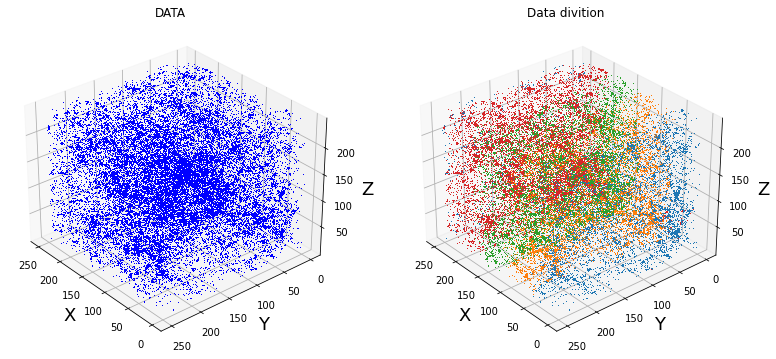

In [107]:
fig = plt.figure(figsize=(13,6))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot3D(data.T[0],data.T[1],data.T[2],',b')
ax.set_xlabel('X',fontsize=18)
ax.set_ylabel('Y',fontsize=18)
ax.set_zlabel('Z',fontsize=18)
plt.title('DATA')
ax.view_init(30, 140)

ax = fig.add_subplot(1, 2, 2, projection='3d')
for i in range(div):
    ax.plot3D(data_part[i].T[0],data_part[i].T[1],data_part[i].T[2],',')
ax.set_xlabel('X',fontsize=18)
ax.set_ylabel('Y',fontsize=18)
ax.set_zlabel('Z',fontsize=18)
plt.title('Data divition')
ax.view_init(30, 140)

plt.show()

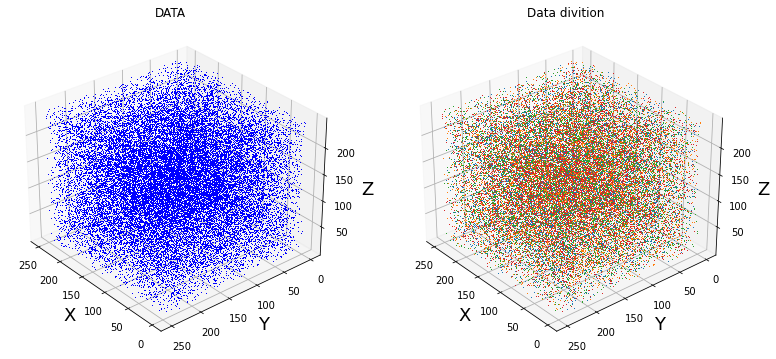

In [59]:
fig = plt.figure(figsize=(13,6))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot3D(rand.T[0],rand.T[1],rand.T[2],',b')
ax.set_xlabel('X',fontsize=18)
ax.set_ylabel('Y',fontsize=18)
ax.set_zlabel('Z',fontsize=18)
plt.title('DATA')
ax.view_init(30, 140)

ax = fig.add_subplot(1, 2, 2, projection='3d')
for i in range(div):
    ax.plot3D(rand_part[i].T[0],rand_part[i].T[1],rand_part[i].T[2],',')
ax.set_xlabel('X',fontsize=18)
ax.set_ylabel('Y',fontsize=18)
ax.set_zlabel('Z',fontsize=18)
plt.title('Data divition')
ax.view_init(30, 140)

plt.show()

In [66]:
data[:,2]

array([  6.124214,  16.836788,  19.894918, ..., 220.890869, 234.23999 ,
       233.842285])

In [63]:
data

array([[  1.598884,   1.722954,   6.124214],
       [  3.420949,   4.652087,  16.836788],
       [249.556366,   0.904096,  19.894918],
       ...,
       [242.068283, 248.937302, 220.890869],
       [241.609222, 240.711594, 234.23999 ],
       [243.032166, 238.387161, 233.842285]])

# Volumen

In [180]:
div = 5

min_z = np.min(data[:,2])
max_z = np.max(data[:,2])

tam = (max_z-min_z)/div

data_part = np.array([data[(data[:,0]>tam*(i)) & (data[:,0]<tam*(i+1))] for i in range(div)], dtype=object)
rand_part = np.array([rand[(rand[:,0]>tam*(i)) & (rand[:,0]<tam*(i+1))] for i in range(div)], dtype=object)

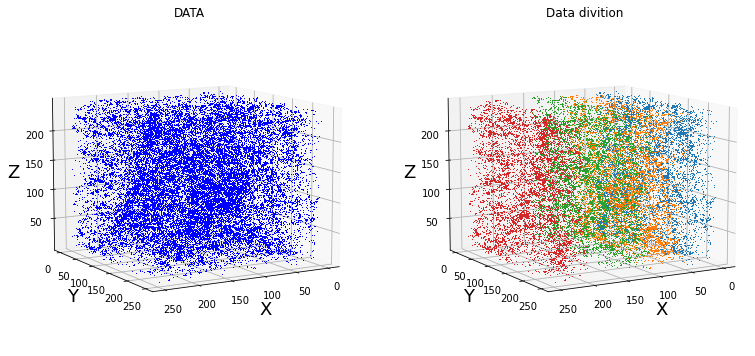

In [181]:
fig = plt.figure(figsize=(13,6))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot3D(data.T[0],data.T[1],data.T[2],',b')
ax.set_xlabel('X',fontsize=18)
ax.set_ylabel('Y',fontsize=18)
ax.set_zlabel('Z',fontsize=18)
plt.title('DATA')
ax.view_init(10, 60)

ax = fig.add_subplot(1, 2, 2, projection='3d')
for i in range(div):
    if i == 3:
        pass
    else:
        ax.plot3D(data_part[i].T[0],data_part[i].T[1],data_part[i].T[2],',')
ax.set_xlabel('X',fontsize=18)
ax.set_ylabel('Y',fontsize=18)
ax.set_zlabel('Z',fontsize=18)
plt.title('Data divition')
ax.view_init(10, 60)

plt.show()

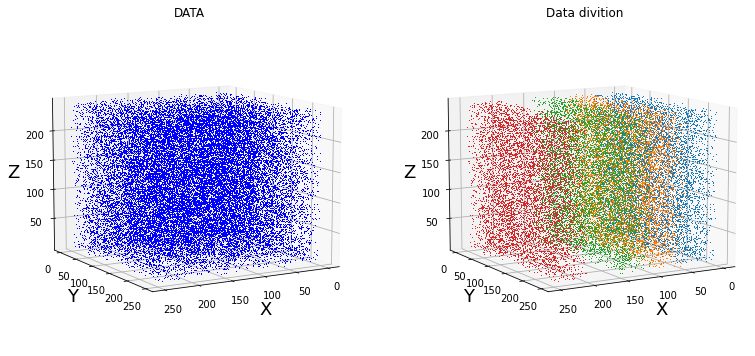

In [182]:
fig = plt.figure(figsize=(13,6))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot3D(rand.T[0],rand.T[1],rand.T[2],',b')
ax.set_xlabel('X',fontsize=18)
ax.set_ylabel('Y',fontsize=18)
ax.set_zlabel('Z',fontsize=18)
plt.title('DATA')
ax.view_init(10, 60)

ax = fig.add_subplot(1, 2, 2, projection='3d')
for i in range(div):
    if i == 3:
        pass
    else:
        ax.plot3D(rand_part[i].T[0],rand_part[i].T[1],rand_part[i].T[2],',')
ax.set_xlabel('X',fontsize=18)
ax.set_ylabel('Y',fontsize=18)
ax.set_zlabel('Z',fontsize=18)
plt.title('Data divition')
ax.view_init(10, 60)

plt.show()

# FB con Anisotropia (eje z como linea de observacion)

In [183]:
#FUNCIÓN DE CORRELACIÓN Peebles-Hauser
def Histos_ani(p,p_r,bn,point_max):
    
    """ 
    Función para construir los histogramas en 2D con anisotropia
    
    p = datos
    p_r = random
    bn = tamaño de bins
    point_max = punto máximo en el histograma
    
    """
    
    # Iniciamos los arreglos los histogramas 
    NDD = np.zeros((bn,bn))
    NRR = np.zeros((bn,bn))
    NDR = np.zeros((bn,bn))
    
    n = 0
    for (ii, jj) in zip(p, p_r):
        n = n+1
        
        #DD
        s = ii-p[n:] # vectores diferencia entre dos puntos
        r_ort = np.sqrt(s[:,0]**2+s[:,1]**2)
        r_pll = np.abs(ii[2]-p[n:,2])
        
        #Hacemos los histogramas para estas distancias 
        dis, x,y = np.histogram2d(r_pll, r_ort, bins=[bn,bn], range=([[0, point_max], [0, point_max]]))
        NDD = NDD + 2*dis
        
        #RR
        s = jj-p_r[n:] # vectores diferencia entre dos puntos
        r_ort = np.sqrt(s[:,0]**2+s[:,1]**2)
        r_pll = np.abs(jj[2]-p_r[n:,2])
        dis, x,y = np.histogram2d(r_pll, r_ort, bins=[bn,bn], range=([[0, point_max], [0, point_max]]))
        NRR = NRR + 2*dis
    
    
    for ii in p:
        s = ii-p_r # vectores diferencia entre dos puntos
        r_ort = np.sqrt(s[:,0]**2+s[:,1]**2)
        r_pll = np.abs(ii[2]-p_r[:,2])
        dis, x,y  = np.histogram2d(r_pll, r_ort, bins=[bn,bn], range=([[0, point_max], [0, point_max]]))
        NDR = NDR + dis
          
    
    #return  NDD, NRR, NDR
    return (NDD - 2*NDR + NRR)/NRR

In [184]:
#Paralelizado
nuc = 2

start_pll = time.perf_counter()

epsilons = Parallel(n_jobs=nuc)(delayed(Histos_ani)(data_part[i],rand_part[i]
                                                    ,30,180) for i in range(div))

finish_pll = time.perf_counter()
print(f'Finializó en {round(finish_pll-start_pll,2)} segundos\n')

Finializó en 32.65 segundos



In [185]:
def imag(x,y,t,cmap,limt):
    
    u = np.linspace(0,180,1000)
    v = u
    
    plt.figure(figsize=(6,6), dpi=100)
    plt.imshow(x,origin='lower',cmap=cmap, extent=[0,180,0,180],
               interpolation= 'bilinear', vmin=-limt, vmax=limt)
    cax=plt.colorbar()
    plt.contour(x,10,cmap=plt.cm.gray,linewidths=1
                ,extent=[0,180,0,180],vmin=-limt, vmax=limt)
    plt.plot(u,v,'')
    plt.scatter(100,100)
    plt.ylabel('$r_{\pi}$',fontsize = 16)
    plt.xlabel('$r_{p}$',fontsize = 16)
    plt.title(y,fontsize = 16)
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    cax.set_label(t,labelpad = 15,fontsize = 15)
    line_colour1 = ('royalblue', 'blue', 'mediumblue', 'darkblue')
    plt.plot()

In [198]:
#np.sum(epsilons,axis=1)/div

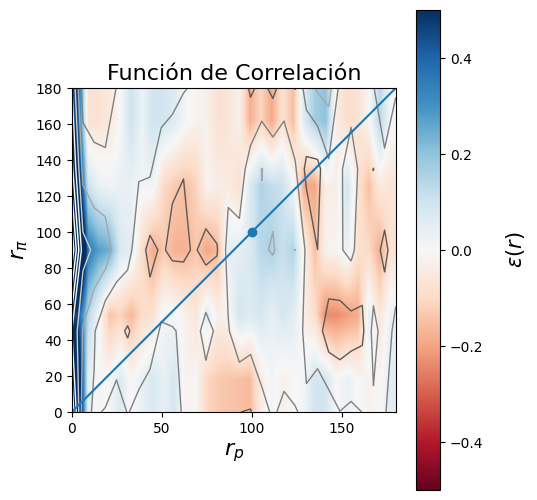

In [199]:
limt=0.5
imag(np.sum(epsilons,axis=1)/div,'Función de Correlación','$\epsilon(r)$',cmap='RdBu', limt=limt)

In [152]:
np.delete(data_part,3)

array([array([[  1.598884,   1.722954,   6.124214],
       [  3.420949,   4.652087,  16.836788],
       [249.556366,   0.904096,  19.894918],
       ...,
       [241.353714, 249.326248,  30.380365],
       [239.107819, 240.320557,  48.80814 ],
       [239.918213, 240.088196,  49.492603]]),
       array([[  7.707654,   3.829475,  57.4189  ],
       [ 12.224124, 249.246658,  70.130394],
       [ 12.48654 , 249.00563 ,  73.230293],
       ...,
       [249.452759, 245.998672,  73.843681],
       [248.101288, 244.416565,  77.363388],
       [246.415756, 244.922623,  96.675056]]),
       array([[ 10.288738, 246.529785, 100.177467],
       [  4.96509 , 249.505844, 105.295334],
       [247.398956, 243.717392, 128.874847],
       ...,
       [247.222885, 244.643448, 129.123978],
       [245.084091, 237.492523, 138.742859],
       [244.33638 , 236.694229, 144.999008]]),
       array([[  0.809101,   6.264958, 206.78746 ],
       [  0.324566,   6.329123, 204.86734 ],
       [245.142654, 249.889816